<h1 style="text-align:center;">Gradient Boosting</h1>

## Introduction

1. **Definition**: Boosting is an ensemble learning technique that amalgamates multiple weak learners to craft a robust learner. A weak learner is slightly more accurate than random guessing. In XGBoost, these learners are shallow decision trees, offering speed and better performance due to their resistance to overfitting compared to deep trees.
   
2. **Iterative Training and Error Correction**: The essence of boosting lies in its iterative approach. Each cycle concentrates on the examples misclassified by the preceding learner, adjusting new trees based on the errors of their forebears. This sequential correction of errors stands as a unique feature of boosting, allowing it to learn and adapt from the mistakes of individual trees.
   
3. **Final Prediction**: After iterative training, the predictions from all weak learners are consolidated through a weighted majority vote, yielding the final prediction.

4. **Contrast with Bagging**: Diverging from bagging, where new trees are constructed from scratch without considering previous trees, boosting builds each new tree from the knowledge gained from the previous one. This results in a series of trees that do not function in isolation but work collaboratively, enhancing each other's predictions.



Boosting orchestrates a symphony of weak learners, typically shallow trees slightly better than random guessers, to forge a potent learner. In the intricate dance of XGBoost, these learners iteratively focus on the previously misclassified examples, building upon the errors of their predecessors rather than starting afresh, a marked departure from bagging. This iterative correction prevents overfitting and facilitates more accurate and faster results.

Imagine a game of billiards where each shot (or tree) in boosting is a strategic play, meticulously calculated based on the previous shot's outcome, aiming to correct the preceding errors and inch closer to the winning pocket. In contrast, each shot in bagging is independent, like playing several games simultaneously, each with a fresh start, no reference to the previous shots, and the final outcome is an aggregation of all these independent games. Boosting, therefore, is a sequential, learning game, perfecting its strategy with each shot, while bagging is a parallel, non-learning approach, relying on the collective outcome of individual, unrelated shots.

We can perceive boosting as a masterful billiards player, who meticulously learns and adapts from each shot, honing his strategy to pocket the ball with increased precision with each successive attempt.

1. **AdaBoost**

   AdaBoost, which stands for Adaptive Boosting, is a popular boosting model that originated early in the field of machine learning. This algorithm operates by adjusting the weights of each new tree based on the errors of the previous trees, giving higher attention to predictions that were incorrect by adjusting the weights that influence those samples at a higher rate. This method of learning from its mistakes allows AdaBoost to transform weak learners into strong learners. A weak learner is a machine learning algorithm that performs just slightly better than random chance, while a strong learner is one that has learned significantly from the data and performs well.

   AdaBoost emphasizes an iterative process of error correction rather than establishing a strong baseline model from the beginning. The goal is to evolve weak learners into strong learners over hundreds of iterations, with the process being very effective in producing optimal results, making it one of the best general machine learning strategies for several years.

   In practice, AdaBoost is quite straightforward to implement, especially using the scikit-learn library where the AdaBoostRegressor and AdaBoostClassifier algorithms can be found. These algorithms can be downloaded from the `sklearn.ensemble` library and fit to any training set. The most crucial hyperparameter to adjust in AdaBoost is `n_estimators`, which determines the number of trees (or iterations) required to create a strong learner.

2. **Gradient Boosting**

   Gradient boosting, though similar to AdaBoost in focusing on incorrect predictions, takes a slightly different approach. It builds each new tree entirely based on the errors of the previous tree's predictions, focusing solely on correcting the mistakes without considering the predictions that were already correct. This approach necessitates a method that aggregates the errors to make accurate final predictions, leveraging the residuals, which represent the difference between the model's predictions and the actual values. The central process in gradient boosting is the computation of these residuals and their summation to evaluate the model's performance. 

   This method of focusing strictly on errors and utilizing residuals is also fundamental to XGBoost, an advanced form of gradient boosting. Understanding the computation and summation of residuals is vital when building a gradient boosting model, as it forms the core concept around which the model is developed.

   In a more hands-on section to follow, the text suggests that readers will be guided to build their own version of a gradient boosting model, where the process of computing and summing residuals will become clearer. This segment aims to provide a deeper understanding of how gradient boosting operates, with an emphasis on the mathematical concept of residuals and their role in the algorithm's functionality.


## Build Gradient Boosting models from scratch

We continue with the bike rentals dataset to compare new models with the previous models.

In [38]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
from helper_file import *
import warnings

warnings.filterwarnings('ignore')

In [3]:
df_bikes.sample(n=3, random_state=43)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
335,336,2011-12-02,4.0,0.0,12.0,0.0,5.0,1.0,1,0.314167,0.331433,0.625833,0.100754,268,3672,3940
631,632,2012-09-23,4.0,1.0,9.0,0.0,0.0,0.0,1,0.529167,0.518933,0.467083,0.223258,2454,5453,7907
620,621,2012-09-12,3.0,1.0,9.0,0.0,3.0,1.0,1,0.599167,0.570075,0.577083,0.131846,1050,6820,7870


In [4]:
bikes_X, bikes_y = splitX_y(df_bikes, 'cnt')

print(f"shape of target vector: {bikes_y.shape}")
print(f"shape of feature matrix: {bikes_X.shape}")

shape of target vector: (731,)
shape of feature matrix: (731, 15)


In [9]:
bikes_X_train, bikes_X_test, bikes_y_train, bikes_y_test = train_test_split(
        bikes_X, bikes_y, random_state=43)

In [13]:
pipe = Pipeline(
    [('tweak', PrepDataTransformer()),
     ('imputer', SimpleImputer(strategy='median')),  # Imputing null values using mean
     ('scaler', StandardScaler())
    ]
)

X_train = pipe.fit_transform(bikes_X_train)
X_test = pipe.transform(bikes_X_test)


tree_1 = DecisionTreeRegressor(max_depth=2, random_state=43)

tree_1.fit(X_train, y_train)

y_train_pred = tree_1.predict(X_train)

The residuals are defined as `y2_train` because they are the new target column for the next tree.

In [14]:
y2_train = y_train - y_train_pred

Well, you see, when we're venturing to fit a new tree based on the residuals, it's a wholly different endeavor compared to just fitting a model on the initial training set. It's almost like fine-tuning a musical instrument, honing in more and more until the sound is just right.

Now, the crux of the matter lies in the predictions, in the nuances of the data we're dealing with. Let's take the bike rentals dataset as an illustration. When we embark on the journey of fitting a new tree on these residuals, it's akin to zooming in closer and closer, observing the finer details, and as a result, we find that the numbers tend to taper off, becoming progressively smaller, refining their accuracy.

So, to kick things off, what we'd do is we'd spark up a new tree, alright? We take this fledgling tree and nurture it with the X_train data and the y2_train residuals. It's like embarking on a new experiment with refined parameters, drawing closer to the truth with each step.

In [15]:
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=43)

tree_2.fit(X_train, y2_train)

DecisionTreeRegressor(max_depth=2, random_state=43)

Alright, let's delve a bit deeper here. You see, the magic of this procedure is in its repetitiveness, in its dedication to honing the model bit by bit. It's akin to a persistent scientist, tirelessly revisiting his experiment, tweaking variables here and there, inching ever closer to a more refined truth.

Now, as we immerse ourselves further into this process, you'll notice a beautiful phenomenon unfold. The residuals, those indicators of our errors, they start flirting with the zero mark, gracefully dancing closer from both the positive and negative sides. It's like watching an artist meticulously perfecting his craft, removing excess here, adding a touch there, until a masterpiece emerges.

And mind you, this isn't a hasty process. Oh no, we carry on with this dance for a specified number of rounds, dictated by this entity we call `n_estimators`. It's our guide, determining the span of our journey in the quest for the perfect model.

Now, shall we venture a bit further? Let's embark on crafting a third tree in our growing forest of knowledge, navigating the intricacies with the wisdom we've garnered thus far. Let's proceed as follows:

In [16]:
y2_train_pred = tree_2.predict(X_train)

y3_train = y2_train - y2_train_pred

tree_3 = DecisionTreeRegressor(max_depth=2, random_state=2)

tree_3.fit(X_train, y3_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

Alright, let's delve a bit deeper here. You see, the magic of this procedure is in its repetitiveness, in its dedication to honing the model bit by bit. It's akin to a persistent scientist, tirelessly revisiting his experiment, tweaking variables here and there, inching ever closer to a more refined truth.

Now, as we immerse ourselves further into this process, you'll notice a beautiful phenomenon unfold. The residuals, those indicators of our errors, they start flirting with the zero mark, gracefully dancing closer from both the positive and negative sides. It's like watching an artist meticulously perfecting his craft, removing excess here, adding a touch there, until a masterpiece emerges.

And mind you, this isn't a hasty process. Oh no, we carry on with this dance for a specified number of rounds, dictated by this entity we call `n_estimators`. It's our guide, determining the span of our journey in the quest for the perfect model.

Now, shall we venture a bit further? Let's embark on crafting a third tree in our growing forest of knowledge, navigating the intricacies with the wisdom we've garnered thus far. Let's proceed as follows:

In [18]:
y1_pred = tree_1.predict(X_test)

y2_pred = tree_2.predict(X_test)

y3_pred = tree_3.predict(X_test)

y_pred = y1_pred + y2_pred + y3_pred

We are summing the predictions, since they are positive and negative differences, which will result in predictions that are closer to the target column.

We then compute the mean squared error (MSE) to obtain the results.

In [20]:
MSE(y_test, y_pred)**0.5

956.8070438794563

This is from a weak learner. We should be in the right direction.

Alright, now let's embark on a little experiment, shall we? Let's see if we can conjure the same magic, the same outcomes that we witnessed in the previous section, but this time with the aid of scikit-learn's `GradientBoostingRegressor`. It's a bit like having a master tool in our toolkit, a clever shortcut in our path of exploration.

Now, the beauty of harnessing the power of the `GradientBoostingRegressor` lies in its simplicity and speed. With just a few tweaks here and there, a bit of finetuning of the hyperparameters, we find ourselves with a mechanism that's not only swift in building these complex structures but also remarkably straightforward to implement. It's a testament to human ingenuity, creating tools that make the journey of discovery both exhilarating and efficient. Let's forge ahead and see where this path leads us, shall we?

Alright, let's get down to brass tacks here. When we're setting up the GradientBoostingRegressor, we've got a few key settings to nail down to sync up with our previous results.

First, we've got to set `max_depth` to 2, keeping things not too complex, but just deep enough. Next, we adjust the `random_state` to 43 (for me the age I was when I moved into Data Science and used just for consistency), ensuring a stable ground to start from.

Now, since we're working with just three trees here, it's clear as day that our `n_estimators` should be set to 3. And don't forget the `learning_rate`; we're going full steam ahead with a value of 1.0.

So, there you have it, a straightforward setup to get us up and running. Let's dive in!

In [22]:
gbr = GradientBoostingRegressor(max_depth=2, 
                                n_estimators=3, 
                                random_state=43, 
                                learning_rate=1.0)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

MSE(y_test, y_pred)**0.5

956.8070438794563

Seems like we got virtally the same answer to an extent!

Remember, the whole gist of gradient boosting is to gradually elevate a model from a mere novice, a weak learner, to a seasoned pro, a strong learner. And this isn't a Herculean task. Quite the contrary, it's a matter of tweaking a single parameter: the `n_estimators`, which dictates the number of rounds in this educational bout.

Now, let's roll up our sleeves and construct a gradient boosting regressor that's got a bit more muscle, sporting a solid team of 30 estimators. It's time to see what kind of performance we can squeeze out of this setup, shall we?

In [23]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=30, random_state=43, learning_rate=1.0)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

MSE(y_test, y_pred)**0.5

769.997212788511

What a remarkable improvement! Lets keep making some changes.

In [25]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=43, learning_rate=1.0)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

MSE(y_test, y_pred)**0.5

783.395824108858

It is not getting any better. Maybe we change the `learning_rate` to the defualt value (by removing the argument all together) and see.

In [26]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=43)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

MSE(y_test, y_pred)**0.5

645.5402576317445

The score has improved dramatically by using the default `learning_rate`.

Now, let's chat about this character in our story, the `learning_rate`, also known in some circles as the _shrinkage_. You see, it acts like a vigilant guardian, ensuring that each tree in our ensemble doesn't get too big for its boots, dominating the scene and overshadowing the contributions of its fellow trees. It's a delicate balance, you know, making sure that the ensemble is not just a one-man show, but a harmonious collaboration, a symphony of insights from various learners, each learning from the errors of the one before.

Now, if we're not mindful, if we don't calibrate our instruments finely, the early players in this ensemble might steal the spotlight, influencing the performance too heavily, swaying the subsequent development in an undesirable direction. That's where our `learning_rate` steps in, reigning in the individual trees, making sure no one steps out of line.

Now, a general rule of thumb here is a bit of a balancing act. As we increase our troop of trees, denoted by `n_estimators`, we ought to dial back the `learning_rate` a notch, maintaining a harmonious equilibrium in the ensemble.

But pinpointing the golden number for the `learning_rate` isn't a straightforward affair. It's more of an art, involving a dance with `n_estimators`, tweaking and tuning until we find that sweet spot. To get a clear picture, let's first freeze our `n_estimators` and play around with the `learning_rate`, observing its solo performance, which dances between 0 and 1. At the extreme of 1, it's a free reign, no holds barred, while a modest 0.1 means it's taking a step back, letting the tree sway with a 10% influence.

So, let's delve in and explore this intricate dance, shall we?

In [30]:
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]

for val in learning_rate_values:

    gbr = GradientBoostingRegressor(max_depth=2, 
                                    n_estimators=300, 
                                    random_state=43, learning_rate=val)

    gbr.fit(X_train, y_train)

    y_pred = gbr.predict(X_test)

    rmse = MSE(y_test, y_pred)**0.5

    print(f'Learning Rate:{val}, Score:{rmse}')

Learning Rate:0.001, Score:1599.2804790000298
Learning Rate:0.01, Score:825.2711928605702
Learning Rate:0.05, Score:680.3039967983532
Learning Rate:0.1, Score:645.5402576317445
Learning Rate:0.15, Score:644.7173417657776
Learning Rate:0.2, Score:666.9592911247934
Learning Rate:0.3, Score:671.6556810763345
Learning Rate:0.5, Score:730.3993358807038
Learning Rate:1.0, Score:783.395824108858


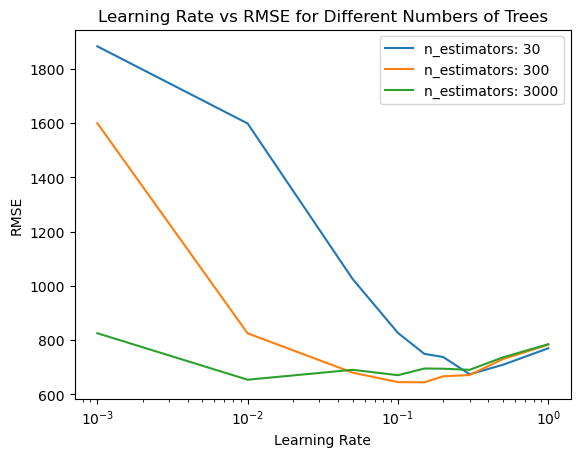

In [33]:

# Define the learning rate values
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]

# Define the different numbers of trees
n_estimators_values = [30, 300, 3000]

# Initialize an empty dictionary to store the RMSE values
rmse_values = {n: [] for n in n_estimators_values}

# Loop through the different numbers of trees
for n in n_estimators_values:
    # Loop through the learning rate values
    for val in learning_rate_values:
        # Initialize and train the model
        gbr = GradientBoostingRegressor(max_depth=2, n_estimators=n, random_state=43, learning_rate=val)
        gbr.fit(X_train, y_train)
        
        # Make predictions
        y_pred = gbr.predict(X_test)
        
        # Calculate the RMSE
        rmse = MSE(y_test, y_pred)**0.5
        
        # Store the RMSE value
        rmse_values[n].append(rmse)
    
    # Plot the RMSE values against the learning rate values
    plt.plot(learning_rate_values, rmse_values[n], label=f'n_estimators: {n}')

# Customize the plot
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.title('Learning Rate vs RMSE for Different Numbers of Trees')
plt.legend()

# Display the plot
plt.show()


The graph above just shows how varying the `learning_rate` and `n_estimators` both work together to give the best results. They are best tuned together.

### Base learner
The initial decision tree in the gradient boosting regressor is called the base learner because it's at the base of the ensemble. It's the first learner in the process. The term learner here is indicative of a weak learner transforming into a strong learner.
 Picture it as the rookie stepping onto the field for the first time, standing at the foundation of what will become a magnificent ensemble of learners. It's the one kicking things off, setting the stage for a series of transformations, where humble beginners morph into seasoned experts, or in our terms, where weak learners evolve into strong learners.

Now, while it might seem like these base learners don't need to be precision-engineered for utmost accuraer, there's indeed room for fine-tuning, for eking out that extra bit of performance. 

To paint a clearer picture, imagine we're in the lab, tweaking and tuning our setup, perhaps experimenting with different `max_depth` values - say 1, 2, 3, or 4. It's like setting different stages, observing and comparing the outcomes, a scientific exploration to seek potential enhancements in accuracy. So, let's roll up our sleeves and delve into this fascinating experiment, shall we?

In [34]:
depths = [None, 1, 2, 3, 4]

for depth in depths:

    gbr = GradientBoostingRegressor(max_depth=depth, 
                                    n_estimators=300, random_state=43)

    gbr.fit(X_train, y_train)

    y_pred = gbr.predict(X_test)

    rmse = MSE(y_test, y_pred)**0.5

    print(f'Max Depth: {depth}, Score: {rmse}')


Max Depth: None, Score: 890.5031697182627
Max Depth: 1, Score: 677.8264526320439
Max Depth: 2, Score: 645.5402576317445
Max Depth: 3, Score: 656.7701000465271
Max Depth: 4, Score: 661.9327808875072


`max_depth=2` seems to give the best results. We can use all the other similar hyper parameters we have dealt with on the notebook of Decision Trees.

### subsample

Alright, let's delve a little into this concept called `subsample`, a term that essentially refers to a selective group of samples. Now, picture your data as a grand tableau, with each row representing a unique snapshot, a distinct sample. What `subsample` does is quite fascinating - it cherry-picks a fraction of these rows, not necessarily embracing them all, when orchestrating each tree in our ensemble.

Now, here's where the artistry comes into play. By tweaking the `subsample` value, shifting it from a full 1.0 to a lesser decimal, we instruct our trees to be a bit more selective, to choose only a certain percentage of the samples during their construction phase. To give you a tangible feel, setting `subsample` to 0.8 is akin to inviting 80% of the samples to participate in the crafting of each tree, giving them a seat at the table.

So, keeping our sails steady with a `max_d=2eof 3, let's venture forth and experiment with varying shades of `subsample` percentages, a quest to fine-tune our ensemble and achieve even more stellar results. Shall we begin?

In [37]:
samples = [1, 0.9, 0.8, 0.7, 0.6, 0.5]

for sample in samples:

    gbr = GradientBoostingRegressor(max_depth=2, 
                                    n_estimators=300, 
                                    subsample=sample, random_state=2)

    gbr.fit(X_train, y_train)

    y_pred = gbr.predict(X_test)

    rmse = MSE(y_test, y_pred)**0.5

    print(f'Subsample: {sample}, Score: {rmse}')

Subsample: 1, Score: 645.7845632904097
Subsample: 0.9, Score: 668.3580237385604
Subsample: 0.8, Score: 658.4632516406297
Subsample: 0.7, Score: 637.8921988751559
Subsample: 0.6, Score: 645.1635414898305
Subsample: 0.5, Score: 614.3169590974911


A subsample value of 0.5 with 300 trees and max_depth of 2 produces the best score here.

### RandomizedSearchCV

Alright, we've managed to sculpt a fairly competent model here, but hold your horses, we haven't embarked on the grand expedition of a grid search just yet, a topic we delved deeply into in Chapter 2, where we explored the intricacies of decision trees.

Based on our initial reconnaissance in the vast landscape of data, it seems we've got a promising starting point for our grid search adventure, anchored around a `max_depth=2`, with a `subsample=0.5`, accompanied by `n_estimators=300` and a `learning_rate=0.1`. It's like setting coordinates for a voyage, a calculated guess to steer us into potentially prosperous territories.

And remember, we've observed a delicate dance between `n_estimators` and `learning_rate`, a ballet of parameters where, as the former ascends, the latter graciously descends, maintaining a harmonious balance in their intertwined performance. Now, let's venture forth, with these insights as our guiding stars, to explore the vast seas of possibilities, tweaking and tuning, in pursuit of the optimal harmony in our model's performance.

In [40]:
params={'subsample':[0.5, 0.55, 0.6, 0.65],
        'n_estimators':[300, 500, 1000],
        'learning_rate':[0.05, 0.075, 0.1]}

In [41]:
gbr = GradientBoostingRegressor(max_depth=2, random_state=43)
rand_reg = RandomizedSearchCV(gbr, 
                              params, n_iter=10, 
                              scoring='neg_mean_squared_error', 
                              cv=5, n_jobs=-1, random_state=43)

rand_reg.fit(X_train, y_train)

best_model = rand_reg.best_estimator_

best_params = rand_reg.best_params_

print(f"Best params:{best_params}")

best_score = np.sqrt(-rand_reg.best_score_)

print(f"Training score: {best_score:.3f}")

y_pred = best_model.predict(X_test)

rmse_test = MSE(y_test, y_pred)**0.5

print(f'Test set score: {rmse_test:.3f}')

Best params:{'subsample': 0.5, 'n_estimators': 1000, 'learning_rate': 0.05}
Training score: 621.873
Test set score: 592.103


To further experiment and potentially enhance our model's performance, we can create a nested for-loop to systematically test various combinations of hyperparameters. 

In [43]:
# Defining a range of values for different hyperparameters
max_depth_values = [2, 3, 4, 5]
subsample_values = [0.5, 0.6, 0.7, 0.8,]
n_estimators_values = [500, 1000, 1600, 2000]
learning_rate_values = [0.05, 0.1, 0.15]

# Initializing the best score to a high value
best_score = float('inf')

# Initializing an empty dictionary to store the best parameters
best_params = {}

# Looping through all possible combinations of hyperparameters
for max_depth in max_depth_values:
    for subsample in subsample_values:
        for n_estimators in n_estimators_values:
            for learning_rate in learning_rate_values:
                
                # Initializing and fitting the model with the current combination of hyperparameters
                gbr = GradientBoostingRegressor(max_depth=max_depth, subsample=subsample, 
                                                n_estimators=n_estimators, learning_rate=learning_rate, 
                                                random_state=43)
                gbr.fit(X_train, y_train)
                
                # Predicting on the test set and calculating the RMSE
                y_pred = gbr.predict(X_test)
                rmse = MSE(y_test, y_pred)**0.5
                
                # Using cross-validation to get a more reliable estimate of the model's performance
                cv_score = -cross_val_score(gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
                cv_score = np.sqrt(cv_score)
                
                # If the current score is less than the best score seen so far, update the best score and best parameters
                if cv_score < best_score:
                    best_score = cv_score
                    best_params = {'max_depth': max_depth, 'subsample': subsample, 
                                   'n_estimators': n_estimators, 'learning_rate': learning_rate}

# Printing the best parameters and best score
print(f"Best parameters: {best_params}")
print(f"Best training score: {best_score:.3f}")

# Using the best parameters to predict on the test set and calculate the test RMSE
best_model = GradientBoostingRegressor(**best_params, random_state=43)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
rmse_test = MSE(y_test, y_pred)**0.5
print(f"Test set score: {rmse_test:.3f}")


Best parameters: {'max_depth': 2, 'subsample': 0.5, 'n_estimators': 500, 'learning_rate': 0.05}
Best training score: 619.136
Test set score: 598.540
